# Mushroom Classification
***

In [1]:
# import starting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0. Load Mushroom Dataset
The mushroom dataset comes from the UCI Machine Learning repository and can be found [here](https://archive.ics.uci.edu/ml/datasets/Mushroom).

In [2]:
# read mushrooms dataset
raw_mushrooms = pd.read_csv('mushrooms.csv')
# display dataset
display(raw_mushrooms)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


***

# 1. Preprocessing

### Single-Letter Categories to Full Name Categories
The only main preprocessing step the dataset requires is the renaming of the feature categories from their single-letter representations to their full name. 
#### *Feature-Category Dictionaries*
Dictionaries that will be used to map the features' single-letter categories to their full names.

In [3]:
# mushroom edibility dictionary
edible_map = {'e':True, 'p':False}

# mushroom shapes
shape = {'b':'bell', 
         'c':'conical', 
         'x':'convex', 
         'f':'flat', 
         'k':'knobbed', 
         's':'sunken',
         'e':'enlarging',
         't':'tapering'}

# mushroom surfaces
surface = {'f':'fibrous', 
           'g':'grooves', 
           'y':'scaly', 
           's':'smooth',
           'k':'silky'}

# mushroom colors
color = {'n':'brown', 
         'b':'buff', 
         'c':'cinnamon', 
         'g':'gray', 
         'r':'green', 
         'p':'pink', 
         'u':'purple', 
         'e':'red', 
         'w':'white', 
         'y':'yellow',
         'k':'black',
         'h':'chocolate',
         'o':'orange'}

# are mushroom bruised?
bruises = {'t':'True', 
           'f':'False'}

# mushroom odors
odor = {'a':'almond',
        'l':'anise', 
        'c':'creosote', 
        'y':'fishy',
        'f':'foul',
        'm':'musty',
        'n':'none',
        'p':'pungent',
        's':'spicy'}

# type of are mushroom was found
habitat = {'g':'grasses',
           'l':'leaves',
           'm':'meadows',
           'p':'paths',
           'u':'urban',
           'w':'waste',
           'd':'woods'}

# type of mushroom distribution
population = {'a':'abundant',
              'c':'clustered',
              'n':'numerous',
              's':'scattered',
              'v':'several',
              'y':'solitary'}

# mushroom gill attachment
gill_attachment = {'a':'attached',
                   'd':'descending',
                   'f':'free',
                   'n':'notched'}

# mushroom gill spacing
gill_spacing = {'c':'close',
                'w':'crowded',
                'd':'distant'}

# mushroom gill size
gill_size = {'b':'broad',
             'n':'narrow'}

# mushroom stalk root descriptions
stalk_root = {'b':'bulbous',
              'c':'club',
              'u':'cup',
              'e':'equal',
              'z':'rhizomorphs',
              'r':'rooted',
              '?': 'missing'}

# mushroom veil types
veil_type = {'p':'partial',
             'u':'universal'}

# number of rings on mushroom
ring_number = {'n':'none',
               'o':'one',
               't':'two'}

# type of ring on the mushroom
ring_type = {'c':'cobwebby', 
             'e':'evanescent',
             'f':'flaring',
             'l':'large',
             'n':'none',
             'p':'pendant',
             's':'sheathing',
             'z':'zone'}

#### *Mapping Dictionary*
Dictionary defining what feature-category dictionary to use for each of the dataset's columns. 

In [4]:
# create column list & replace - with _
columns = list(pd.Series(raw_mushrooms.columns).replace('-', '_', regex=True))
# rename 'class' column to 'edible'
columns[0] = 'edible'

# create list of mapping dictionaries (in order of columns)
maps = [edible_map,
        shape, 
        surface, 
        color, 
        bruises, 
        odor, 
        gill_attachment, 
        gill_spacing, 
        gill_size, 
        color,
        shape, 
        stalk_root, 
        surface,
        surface,
        color,
        color, 
        veil_type, 
        color, 
        ring_number, 
        ring_type, 
        color, 
        population, 
        habitat]

# create final column to map dictionary
mapping_dict = dict(zip(columns, maps))

#### *Update Feature Column & Category Names*
Make a copy of the original dataset for possible future uses and update categorical values of new dataset. Also, rename columns with hyphens by replacing the hyphens with underscores, because hyphens limit the ways the columns can be called; for example, you cannot call the cap shape column of the dataset by writing mushrooms.cap-shape. 

In [5]:
# copy original dataset to create a new dataset named mushrooms
mushrooms = raw_mushrooms.copy()
# rename columns by using columns list created above
mushrooms.columns = columns
# update column values (category names)
mushrooms.replace(mapping_dict, inplace=True)

# display new dataset
display(mushrooms)

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,knobbed,smooth,brown,False,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,True,convex,smooth,brown,False,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,True,flat,smooth,brown,False,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,False,knobbed,scaly,brown,False,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


***

# 2. Explore & Visualize Dataset
## 2.1. Dataset Class Counts
Knowing the class distributions of the dataset proves useful, because some machine learning models require balancing of imbalanced datasets before they can perform well.

In [6]:
# create edible series using edible column from mushroom dataset
edible = mushrooms.edible

# total number of mushrooms observed
num_mushrooms = len(edible)
# number of edible mushrooms
num_edible = np.sum(edible)
# number of poisonous mushrooms
num_poison = num_mushrooms - num_edible
# edible percentage
perc_edible = np.mean(edible) * 100
# poisonous percentage
perc_poison = 100 - perc_edible

# print statistics
print('Total # of Observed Mushrooms: {:,}\n'.format(num_mushrooms))
print('                       Edible: {:,} ({:.0f})%'.format(num_edible, perc_edible))
print('          Poisonous Mushrooms: {:,} ({:.0f})%'.format(num_poison, perc_poison))

Total # of Observed Mushrooms: 8,124

                       Edible: 4,208 (52)%
          Poisonous Mushrooms: 3,916 (48)%


>**Class Counts** We can see that there are a total of 8,124 mushrooms constituting the dataset, and about 52% are edible while the remaining 48% are poisonous; therefore, it can be concluded that the dataset is fairly balanced, so we do not need to do any further balancing.


## 2.2. Most Important Mushroom Features
### 2.2.1. Initial Feature vs. Edibility Correlations

In [7]:
# one-hot-encode all features & get edibility correlations 
mushroom_corr = pd.get_dummies(mushrooms).corr()[1:].edible.sort_values(ascending=False)

# print correlations
print('Mushroom Edibility Correlations:\n-------------------------------')
display(mushroom_corr)

Mushroom Edibility Correlations:
-------------------------------


odor_none                          0.785557
ring_type_pendant                  0.540469
gill_size_broad                    0.540024
bruises_True                       0.501530
stalk_surface_above_ring_smooth    0.491314
                                     ...   
gill_size_narrow                  -0.540024
stalk_surface_below_ring_silky    -0.573524
stalk_surface_above_ring_silky    -0.587658
odor_foul                         -0.623842
veil_type_partial                       NaN
Name: edible, Length: 117, dtype: float64

>**Feature Correlations:** Characteristics with positive correlation values indicate that the probability of a mushroom being edible increases when it has the characteristic; on the other hand, negative correlations indicate the mushroom is more likely to be poisonous if it has such characteristic. Also, “veil_type_partial” has a value of NaN, because all mushrooms observed had partial veil types; this means that there is no correlation between the veil type of mushrooms observed and their edibility. We will now dig deeper into the mushroom dataset in an attempt to understand what features govern the edibility of mushrooms.

### 2.2.2. Plotting, Correlation & Class Count Functions

#### *Plotting Function* 
Plots stacked bar graph of the class counts after filtering

In [8]:
def plot_stacked(categories, poison_counts, edible_counts, feature_title):
    """Plot Stacked Bars Graph"""
    
    # stacked bar location on x-axis
    bar_loc = range(len(categories))
    
    # plot poison bar
    plt.bar(bar_loc, poison_counts, bottom=edible_counts, 
            color='orchid', label='Poisonous')
    
    # plot edible bar
    plt.bar(bar_loc, edible_counts, 
            color='forestgreen', label='Edible')
    
    # map x-ticks to category names
    plt.xticks(bar_loc, categories, rotation = 45)
    
    # set graph attributes
    plt.title(feature_title)
    plt.xlabel(feature_title)
    plt.ylabel('# Mushrooms')
    plt.legend()
    
    # display stacked bar graph
    plt.tight_layout()
    plt.show()

#### *One-Hot Encoding & Correlations Function*
One-hot encodes the filtered dataset & gets feature with strongest correlation

In [9]:
def dummy_corr(data, feature, condition):
    """One-Hot Encode & Correlations"""
   
    # get next filtrated dataset
    filtered_data = data[data[feature] == condition].drop(columns=feature)
    
    # one-hot encode & get correlatoins
    dummy_data = pd.get_dummies(filtered_data, list(filtered_data.columns)[1:])
    dummy_corr = dummy_data.corr().edible.sort_values(ascending=False)[1:]
    
    # get feature with strongest correlation
    next_feature, category = abs(dummy_corr).nlargest(1).index.tolist()[0].rsplit('_', 1)
    
    # get class counts of next feature
    class_counts(filtered_data, condition, feature, next_feature)

#### *Recursive Class Counts Function*
Gets class counts of filtered dataset and feature categories containing mushrooms with mixed classifications

In [10]:
def class_counts(data, condition, original_feature, feature, width=0.35):
    """Class Counts & Unclear Categories"""
    
    ###              ###
    ### Class Counts ###
    ###              ###
    # separate from last plot
    print('----------------------------------------------------------\n')

    # get possible feature categories
    categories = data[feature].unique()
    
    # group by edibility & get counts for each category
    category_counts = data.groupby(by='edible')[feature].value_counts().rename('count').reset_index()

    # get class counts for all categories
    edible_counts = category_counts[category_counts.edible == True]
    poison_counts = category_counts[category_counts.edible == False]

    
    # create the class dictionaries {"category" : muhsroom counts}
    edible_dict = dict(zip(edible_counts[feature], edible_counts['count']))    
    poison_dict = dict(zip(poison_counts[feature], poison_counts['count']))
    
    # create an empty dictionary with all the possible feature categories
    empty_dict = dict(zip(categories, np.zeros(len(categories))))
    
    # update empty dictionary with class dictionaries (current class dictionaries are missing categories)
    edible_dict = dict(empty_dict, **edible_dict)
    poison_dict = dict(empty_dict, **poison_dict)
    
    # get final class counts
    edible_counts = list(edible_dict.values())
    poison_counts = list(poison_dict.values())
    
    
    ###                        ### 
    ### Get Next Filter & Plot ###
    ###                        ###
    # print filtered dataset's title, total number of mushrooms & class counts
    filter_title = original_feature.replace('_', ' ').title()
    print('{} ({}) Mushrooms: {:,}'.format(filter_title, condition.title(), len(data)))
    print('Edible: {:,}\nPoison: {:,}'.format(int(np.sum(edible_counts)), int(np.sum(poison_counts))))
    
    # preprocess next strongest correlation feature column name to print
    feature_title = feature.replace('_', ' ').title()
    
    # plot stacked bar graph of filtered dataset & class counts
    plot_stacked(categories, poison_counts, edible_counts, feature_title)

    # intialize list of categories containing mushrooms with mixed edibility
    unclear_categories = []    
    # loop over all feature categories to get "unclear categories"
    for category in empty_dict.keys():
        # category contains both edible & poisonous mushrooms 
        if edible_dict[category] != 0 and poison_dict[category] != 0:
            # update list & count
            unclear_categories.append(category) 
        
    
    # repeat process for every category with mixed mushrooms
    for num, category in enumerate(unclear_categories, start=1):
        # when more than 1 unclear category; print special title
        if len(unclear_categories) > 1:
            print('----------------------------------------------------------\n')
            print('--- {} (Part {}) ---\n'.format(feature_title, num))
        # recursively repeat process until ALL edible & poisonous mushrooms are separated    
        dummy_corr(data, feature, category)

### 2.2.3. Recursively Get Important Features
**Odor**
> Since odor has the strongest correlation to edibility, we will begin the search for the key mushrooms features by plotting the mushrooms' class counts versus their odor. After plotting, it can be noted that the odor feature is indeed a very important feature of the mushrooms, since it separates edible and poisonous mushrooms very weill; all mushrooms with an anise or almond smell are edible, and mushrooms with pungent, foul, creosote, fishy, spicy or musty smells are all poisonous. However, mushrooms with no odor, while mostly edible, have a possibility of being poisonous; next we will filter the mushroom dataset by only selecting mushrooms without an odor and getting that filtered dataset's feature with the strongest edibility correlation. After filtering for mushrooms with no odor, the feature with the strongest edibility correlation was the spore print color; we will plot the filtered class counts for the various spore print colors. 

**Spore Print Color**
> Of the mushrooms with no odor, the ones with a green spore print were all poisonous, so by looking at the odorless mushrooms' spore print color, we were able to reduce the number of misunderstood poisonous mushrooms from 120 to 48. However, we still have a mixture of edible and poisonous mushrooms when an odorless mushroom has a white spore print; in order to get the final set of features that can separate all edible and poisonous mushrooms, we will recursively repeat the steps done for the odorless mushrooms.

----------------------------------------------------------

 (All) Mushrooms: 8,124
Edible: 4,208
Poison: 3,916


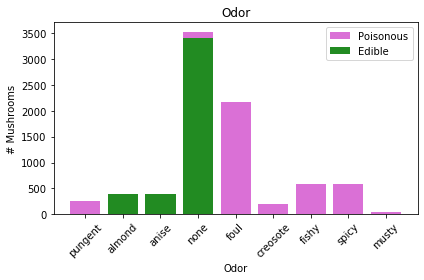

----------------------------------------------------------

Odor (None) Mushrooms: 3,528
Edible: 3,408
Poison: 120


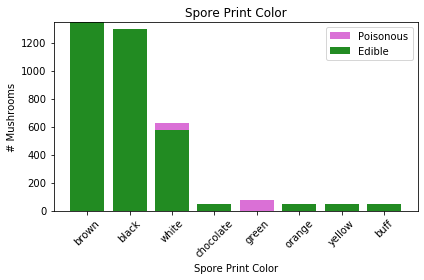

----------------------------------------------------------

Spore Print Color (White) Mushrooms: 624
Edible: 576
Poison: 48


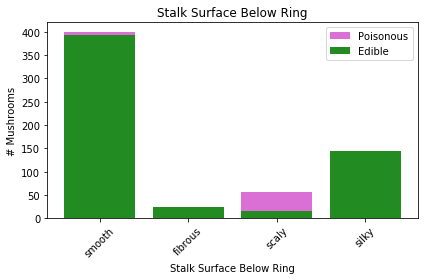

----------------------------------------------------------

--- Stalk Surface Below Ring (Part 1) ---

----------------------------------------------------------

Stalk Surface Below Ring (Smooth) Mushrooms: 400
Edible: 392
Poison: 8


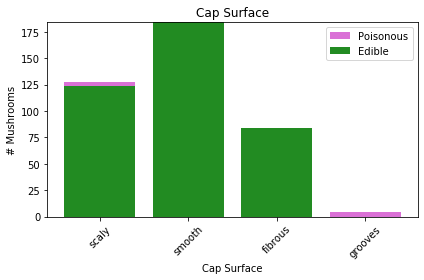

----------------------------------------------------------

Cap Surface (Scaly) Mushrooms: 128
Edible: 124
Poison: 4


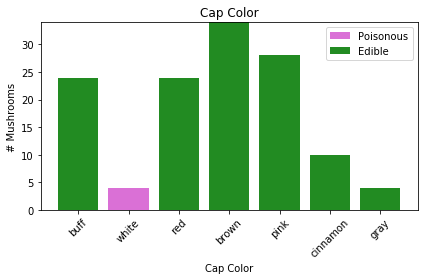

----------------------------------------------------------

--- Stalk Surface Below Ring (Part 2) ---

----------------------------------------------------------

Stalk Surface Below Ring (Scaly) Mushrooms: 56
Edible: 16
Poison: 40


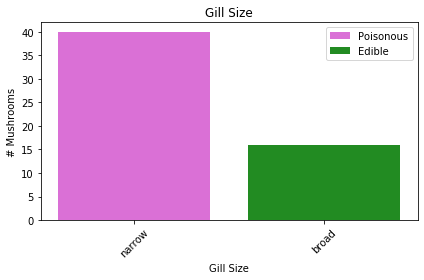

In [11]:
# initialize recursive functions
mushrooms[''] = 'All'
dummy_corr(mushrooms, '', 'All')

>**Exploration & Visualization Insights:** The final set of features arrived upon which were able to separate all the edible and poisonous mushrooms include the mushrooms’ odor, spore print color, stalk surface below rings, cap surface, cap color and gill size. Learning what features best separate edible and poisonous mushrooms will prove very beneficial when constructing the machine learning model, because we will be able to reduce the amount of data the model has to understand and decrease the required model's complexity; from exploring the mushroom dataset, we were able to reduce the number of features from 22 to 6. 

# 3. Machine Learning
When training the machine learning model, we will rely on the insights gained during the exploration phase of the project.

In [12]:
# necessary machine learning libraries
import sklearn.model_selection as sk_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## 3.1. Final Dataset
The dataset we will pass to the machine learning model will only contain the mushrooms’ odor, spore print color, stalk surface below their rings, cap surface, cap color and gill size.

In [13]:
# final features gotten from exploration
important_columns = ['odor', 
                     'spore_print_color', 
                     'stalk_surface_below_ring', 
                     'cap_surface', 
                     'cap_color', 
                     'gill_size']

# create important features dataset & display
important = mushrooms[important_columns]
display(important.head())

,odor,spore_print_color,stalk_surface_below_ring,cap_surface,cap_color,gill_size
0,pungent,black,smooth,smooth,brown,narrow
1,almond,brown,smooth,smooth,yellow,broad
2,anise,brown,smooth,smooth,white,broad
3,pungent,black,smooth,scaly,white,narrow
4,none,brown,smooth,smooth,gray,broad


#### *One-Hot Encode & Split Dataset*

In [14]:
# one-hot encode final dataset & display
important_dummy = pd.get_dummies(important, drop_first=True)
display(important_dummy.head())

# train/test split dataset (75% Training)
X_train, X_test, y_train, y_test = sk_model.train_test_split(important_dummy, edible)

,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,spore_print_color_brown,spore_print_color_buff,...,cap_color_buff,cap_color_cinnamon,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow,gill_size_narrow
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


## 3.2. Fit Model

In [15]:
# train Random Forest on training set
RF = RandomForestClassifier().fit(X_train, y_train)

# print classifier parameters
print('Random Forest Parameters\n------------------------')
print('Number of Estimators: {}'.format(RF.n_estimators))
print('Maximum Features: {}'.format(int(np.sqrt(important_dummy.shape[1]))))

Random Forest Parameters
------------------------
Number of Estimators: 10
Maximum Features: 5


> **Classifier Parameters:** The two most important parameters of the random forest are the number of estimators, a.k.a. number of decision trees, and the maximum number of features a single decision tree could choose from as its next splitting node; as the number of estimators increase, the model’s performance increases at the expense of efficiency and simplicity, and as the number of max features the model can consider for its next internal node decreases, its ability to generalize to new observations improves, because it is forced to learn from multiple features instead of the same ones over and over again. 

## 3.3. Evaluate Model

In [16]:
# predict on test set & score
predictions = RF.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# print results
print('Testing Accuracy: {}% ({:,} Mushrooms)'.format(accuracy * 100, len(predictions)))

Testing Accuracy: 100.0% (2,031 Mushrooms)


> **Model Performance:** After training the final random forest classifier on the training dataset, it achieved a 100% accuracy score on the remaining 2,031 mushrooms found in the testing dataset; no fine-tuning was needed since the default random forest configuration was able to achieve the desired accuracy score. 